### importing necessary libraries

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import  confusion_matrix, classification_report,roc_auc_score,roc_curve, auc
import plotly.express as px
from sklearn.calibration import calibration_curve
from sklearn.cluster import KMeans
from kneed import KneeLocator
from plotly.subplots import make_subplots
from plotly.graph_objs import Figure

### Downloading the dataset

In [2]:
default_of_credit_card_clients = fetch_ucirepo(id=350)
X = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets

### Creating the dataframe

In [3]:
df = pd.concat([X, y], axis=1)

### first five rows of the dataframe

In [4]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### changing the column names

In [5]:
df.columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
              'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
              'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment_next_month']

In [6]:
df.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1


### shape of the dataframe

In [7]:
print(df.shape)

(30000, 24)


### information of the dataframe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_1                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

### checking for missing values

In [9]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

### checking for duplicate values

In [10]:
df.duplicated().sum()

np.int64(35)

In [11]:
df[df.duplicated()]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1980,150000,2,1,1,38,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4585,150000,2,1,1,31,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
6022,210000,2,1,2,39,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
6466,210000,2,2,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
7319,500000,1,1,1,43,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
8320,360000,1,2,1,41,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
10250,50000,1,2,2,26,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
13106,360000,2,1,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
14294,20000,1,2,2,24,2,2,4,4,4,...,1650,1650,1650,0,0,0,0,0,0,1
15458,160000,1,2,2,28,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


## Statistical Analysis

### descriptive statistics

In [12]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


__Observations:__

* High standard deviation of 129,747.66 suggests a wide range of credit limits.
* There is significant variation in credit limits, indicating diverse client profiles.
* Mean of 1.60 indicates an imbalance skewed towards males and approximately 60% are females.
* most clients are university students.
* mean of 1.55 suggests a slight bias toward married clients
* Most clients are punctual or do not use their credit lines.
* A small proportion exhibits significant delays
*  Billing data spans an extremely wide range, requiring normalization for modeling.
* pay data has value -2 which is not defined in the data dictionary.

### Counts and frequency of each categorical variable

In [13]:
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'default_payment_next_month']

for column in categorical_columns:
    print(f"Frequency of {column}:")
    print(df[column].value_counts())


Frequency of SEX:
SEX
2    18112
1    11888
Name: count, dtype: int64
Frequency of EDUCATION:
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
Frequency of MARRIAGE:
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64
Frequency of default_payment_next_month:
default_payment_next_month
0    23364
1     6636
Name: count, dtype: int64


__Observations:__

* As Marraige have a value 0, we consider it as 3 because it is not mentioned in the data description.
* As Education have a value 0, we consider it as 4 because it is not mentioned in the data description and 5,6 are also not mentioned in the data description.

### Distribution metrics

In [14]:
df.skew()


LIMIT_BAL                      0.992867
SEX                           -0.424183
EDUCATION                      0.970972
MARRIAGE                      -0.018742
AGE                            0.732246
PAY_1                          0.731975
PAY_2                          0.790565
PAY_3                          0.840682
PAY_4                          0.999629
PAY_5                          1.008197
PAY_6                          0.948029
BILL_AMT1                      2.663861
BILL_AMT2                      2.705221
BILL_AMT3                      3.087830
BILL_AMT4                      2.821965
BILL_AMT5                      2.876380
BILL_AMT6                      2.846645
PAY_AMT1                      14.668364
PAY_AMT2                      30.453817
PAY_AMT3                      17.216635
PAY_AMT4                      12.904985
PAY_AMT5                      11.127417
PAY_AMT6                      10.640727
default_payment_next_month     1.343504
dtype: float64

_observation:_

* LIMIT_BAL (0.99): Slightly right-skewed. Most credit limits are clustered around the lower end, with some clients having much higher limits.
* SEX (-0.42): Slightly left-skewed, suggesting a marginal over-representation of one gender.
* EDUCATION (0.97): Right-skewed. Higher levels of education may be less frequent.
* MARRIAGE (-0.018): Almost symmetric. No significant skew in marital status.
* AGE (0.73): Right-skewed. Younger clients dominate, with fewer older clients.
* Payment Status (PAY_0 to PAY_6):<br>
Skewed near zero but close to symmetric. Indicates many clients have consistent repayment patterns (on time or minor delays).
* Billing Amounts (BILL_AMTx):<br>
  Moderately skewed to the right (values between 2.6 and 3.0). Some clients have significantly higher bills.
* Payment Amounts (PAY_AMTx):<br>
 Highly right-skewed (e.g., 14.67 for PAY_AMT1 and 30.45 for PAY_AMT2). A few clients make very large payments, likely outliers or high-income individuals.
* Target Variable (default_payment_next_month)<br>
Skewness: 1.34. Right-skewed, indicating fewer defaults compared to non-defaults.

In [15]:
df.kurt()

LIMIT_BAL                        0.536263
SEX                             -1.820190
EDUCATION                        2.078622
MARRIAGE                        -1.363368
AGE                              0.044303
PAY_1                            2.720715
PAY_2                            1.570418
PAY_3                            2.084436
PAY_4                            3.496983
PAY_5                            3.989748
PAY_6                            3.426534
BILL_AMT1                        9.806289
BILL_AMT2                       10.302946
BILL_AMT3                       19.783255
BILL_AMT4                       11.309325
BILL_AMT5                       12.305881
BILL_AMT6                       12.270705
PAY_AMT1                       415.254743
PAY_AMT2                      1641.631911
PAY_AMT3                       564.311229
PAY_AMT4                       277.333768
PAY_AMT5                       180.063940
PAY_AMT6                       167.161430
default_payment_next_month      -0

_observation:_
* LIMIT_BAL (0.54): Platykurtic. Credit limits are more evenly spread, with fewer extreme values.
* SEX (-1.82): Highly platykurtic, indicating minimal variation (binary-like distribution).
* EDUCATION (2.08): Approaching normal but slightly peaked, with some concentration in specific categories.
* MARRIAGE (-1.36): Platykurtic, suggesting a uniform spread of marital categories.
* AGE (0.04): Almost normal, with no heavy tails.
* Payment Status Features (PAY_0 to PAY_6)
Ranges from 1.57 to 3.99, mostly leptokurtic:
Higher values (e.g., PAY_5: 3.99) suggest the presence of extreme delays or outliers in payment behavior.
* Billing Amounts (BILL_AMT1 to BILL_AMT6)
Highly leptokurtic, e.g.:
BILL_AMT3 (19.78): Significant outliers in billing behavior.
Other BILL_AMTx features range between 9.80 to 12.27, indicating consistent outliers across billing data.
* Payment Amounts (PAY_AMT1 to PAY_AMT6)
Exceptionally high kurtosis:
PAY_AMT2 (1641.63), PAY_AMT1 (415.25): Extremely heavy-tailed distributions, with significant variability caused by very large payment amounts.
* Target Variable (default_payment_next_month)
Kurtosis (-0.19): Platykurtic, indicating fewer extreme values and a relatively flat distribution.

### Data Cleaning

#### replacing the values of the columns

In [16]:
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)
pay_features = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for p in pay_features:
    df.loc[df[p]<0, p] = -1
    df.loc[df[p]>=0, p] = df.loc[df[p]>=0, p] + 1
    df[p] = df[p].astype('int64')

#### outlier detection and treatment

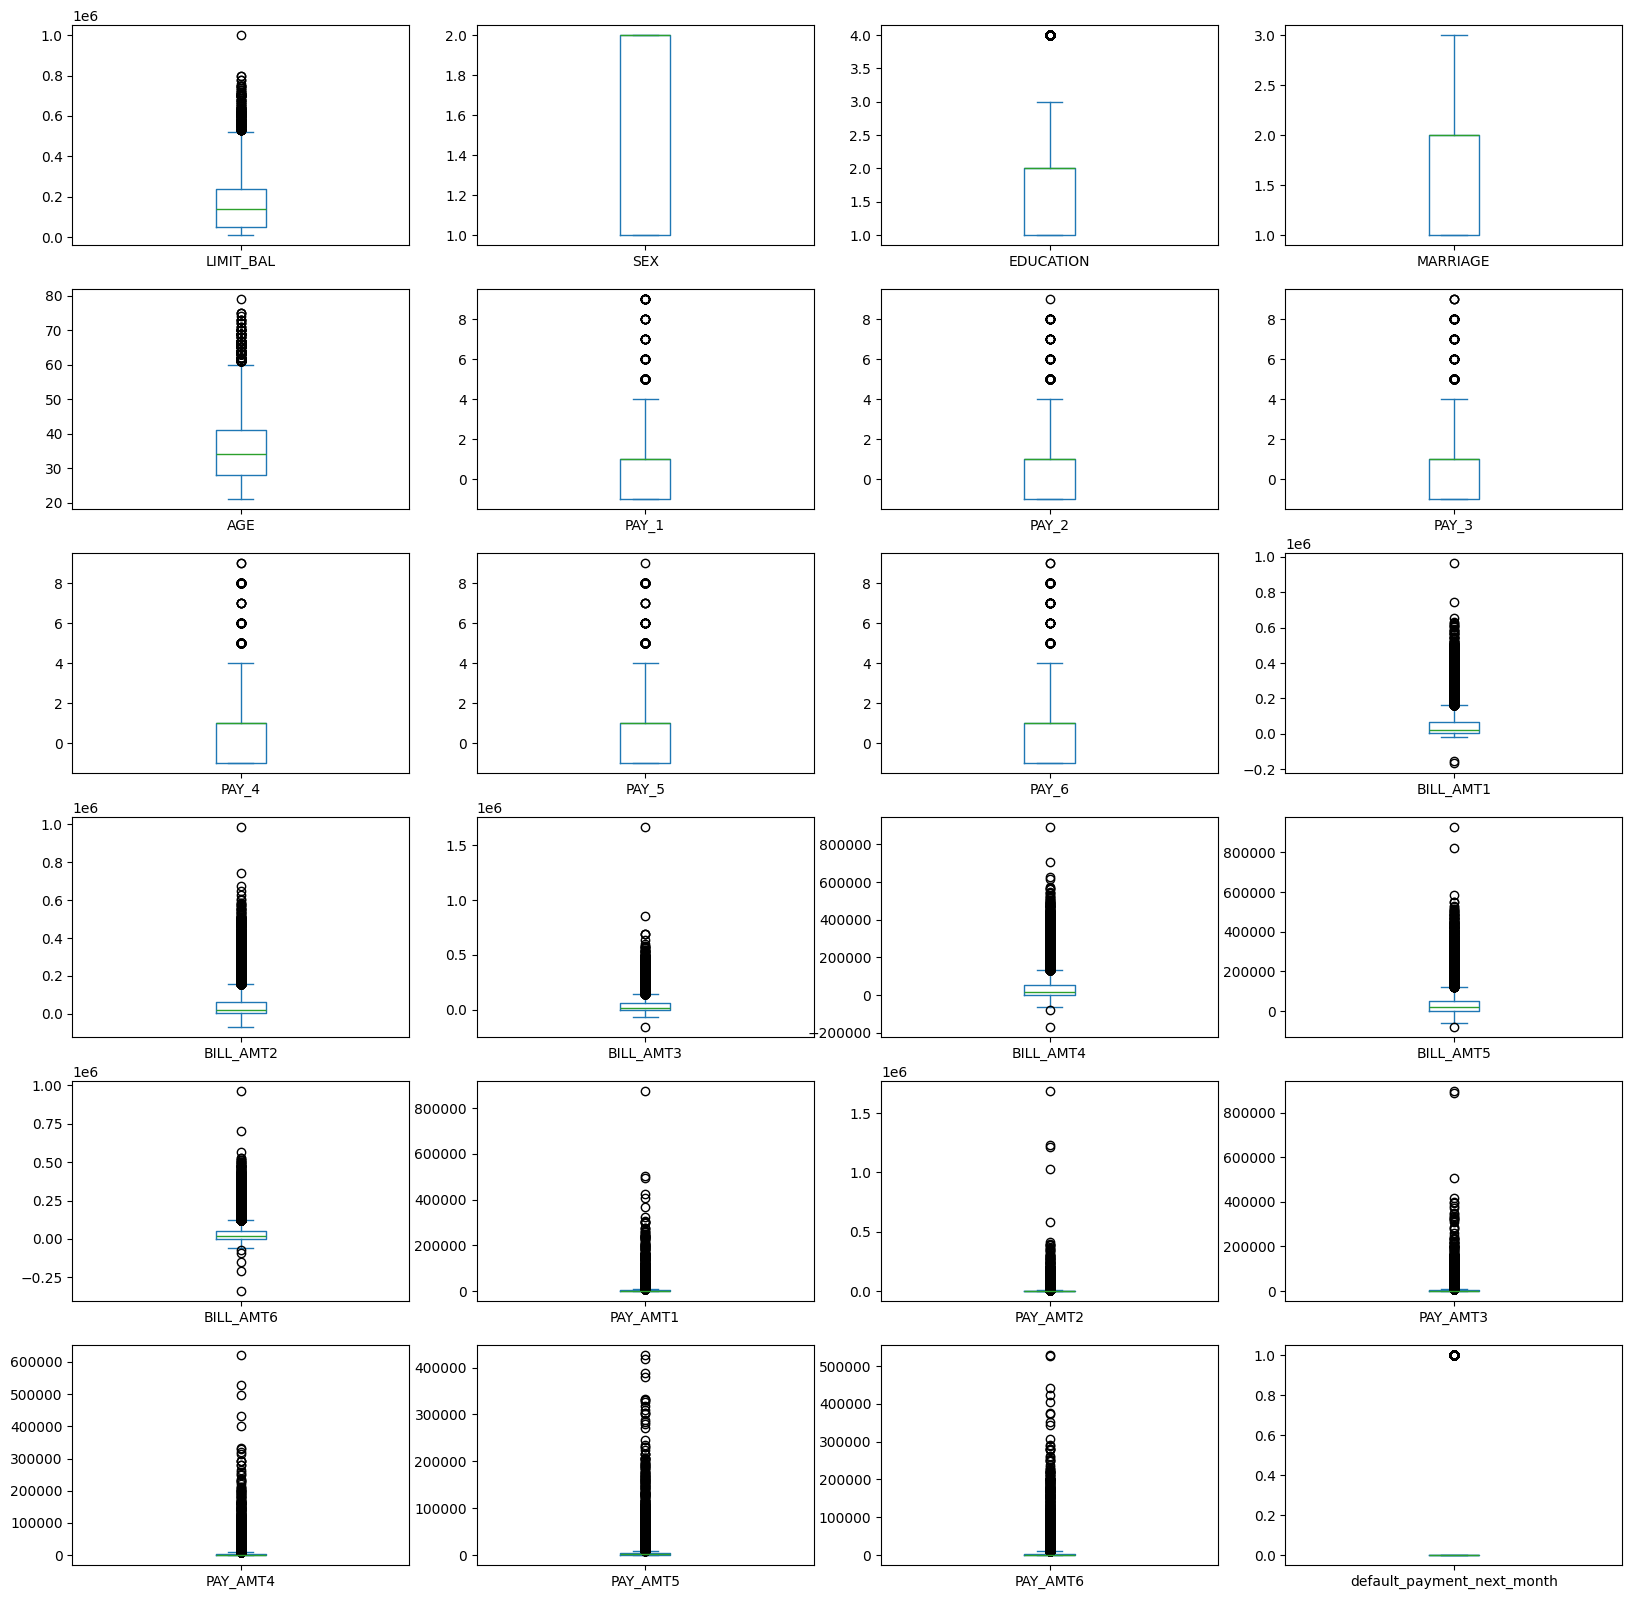

In [17]:
df.plot(kind='box', subplots=True, layout=(6, 4), figsize=(20, 20), sharex=False, sharey=False)
plt.show()

There are outliers in the data. We will check if there are any outliers which are common in all the columns.

In [18]:
outlier_flags = pd.DataFrame()
def calculate_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((df[column] < lower_bound) | (df[column] > upper_bound)).astype(int)
numeric_cols = ['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for col in numeric_cols:
    outlier_flags[col] = calculate_outliers(col)
outlier_flags['total_outlier_flags'] = outlier_flags.sum(axis=1)
common_outliers = outlier_flags[outlier_flags['total_outlier_flags'] > 1]
print(f"Number of rows with outliers in multiple columns: {len(common_outliers)}")
print(common_outliers['total_outlier_flags'].value_counts())
common_outliers.head()


Number of rows with outliers in multiple columns: 6292
total_outlier_flags
2     1721
3     1053
6      931
4      815
5      537
7      437
8      231
12     166
9      130
10     127
11     117
13      23
14       4
Name: count, dtype: int64


,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,total_outlier_flags
6,0,0,0,0,0,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,12
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,2
17,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,1,1,1,1,8
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,5
33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,3


#### removing the outliers

In [19]:
num_columns = df.select_dtypes(include=['float64', 'int64']).shape[1]
outlier_threshold = num_columns * 0.5
rows_to_remove = outlier_flags[outlier_flags['total_outlier_flags'] > outlier_threshold].index
print(f"Number of rows before removing outliers: {len(df)}")
df_clean= df.drop(rows_to_remove)
print(f"Number of rows after removing outliers: {len(df_clean)}")

Number of rows before removing outliers: 30000
Number of rows after removing outliers: 29973


### Exploratory Data Analysis

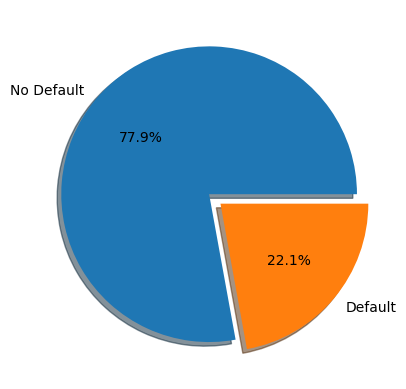

In [20]:
labels = ['No Default', 'Default']
sizes = df_clean['default_payment_next_month'].value_counts()
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True)
plt.show()

_observation:_

* class imbalance in the target variable

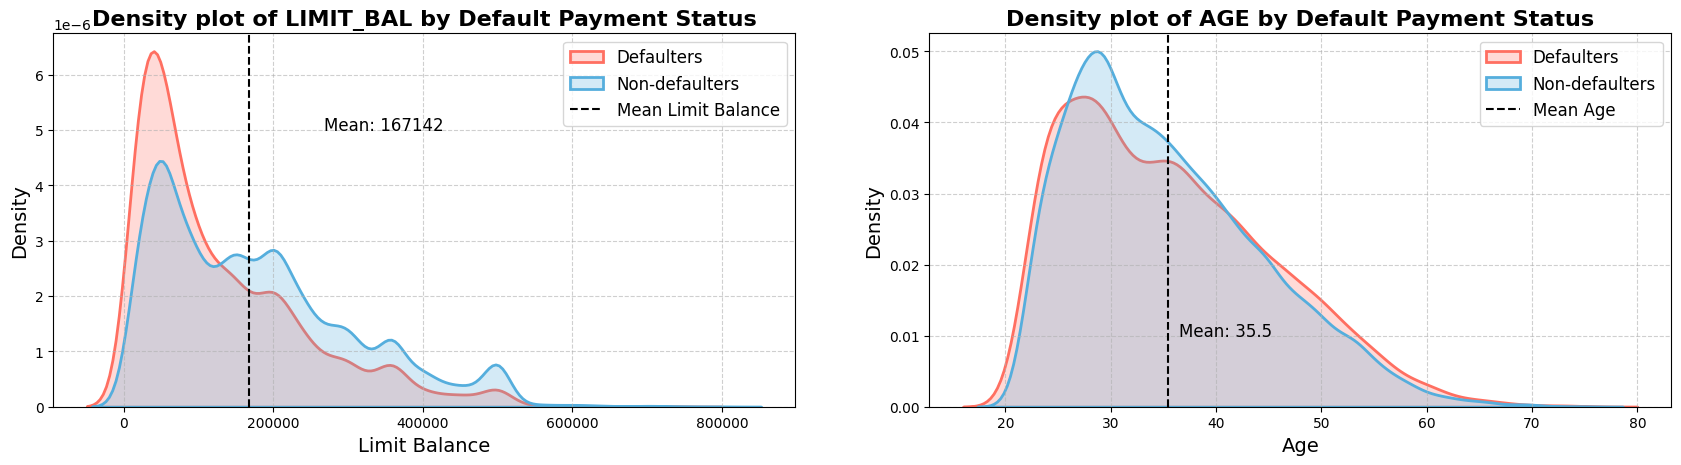

In [21]:
sns.set_palette(['#55AEDD', '#FF6F61'])
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
class_0 = df_clean.loc[df_clean['default_payment_next_month'] == 0]['LIMIT_BAL']
class_1 = df_clean.loc[df_clean['default_payment_next_month'] == 1]['LIMIT_BAL']
axs[0].set_title('Density plot of LIMIT_BAL by Default Payment Status', fontsize=16, fontweight='bold')
sns.kdeplot(class_1, fill=True, label='Defaulters', color='#FF6F61', ax=axs[0], linewidth=2)
sns.kdeplot(class_0, fill=True, label='Non-defaulters', color='#55AEDD', ax=axs[0], linewidth=2)
axs[0].axvline(df_clean['LIMIT_BAL'].mean(), color='black', linestyle='--', label='Mean Limit Balance')  # Add mean line
axs[0].legend(fontsize=12)
axs[0].set_xlabel('Limit Balance', fontsize=14)
axs[0].set_ylabel('Density', fontsize=14)
axs[0].grid(True, linestyle='--', alpha=0.6)
axs[0].text(df_clean['LIMIT_BAL'].mean() + 100000, 0.000005, f'Mean: {df_clean["LIMIT_BAL"].mean():.0f}',
            color='black', fontsize=12)
class_0 = df_clean.loc[df_clean['default_payment_next_month'] == 0]['AGE']
class_1 = df_clean.loc[df_clean['default_payment_next_month'] == 1]['AGE']
axs[1].set_title('Density plot of AGE by Default Payment Status', fontsize=16, fontweight='bold')
sns.kdeplot(class_1, fill=True, label='Defaulters', color='#FF6F61', ax=axs[1], linewidth=2)
sns.kdeplot(class_0, fill=True, label='Non-defaulters', color='#55AEDD', ax=axs[1], linewidth=2)
axs[1].axvline(df_clean['AGE'].mean(), color='black', linestyle='--', label='Mean Age')
axs[1].legend(fontsize=12)
axs[1].set_xlabel('Age', fontsize=14)
axs[1].set_ylabel('Density', fontsize=14)
axs[1].grid(True, linestyle='--', alpha=0.6)
axs[1].text(df_clean['AGE'].mean() + 1, 0.01, f'Mean: {df_clean["AGE"].mean():.1f}',
            color='black', fontsize=12)
fig.tight_layout(pad=5.0)
plt.show()

__Observations:__

* Probability of default is high when the limit is almost almost less than `140000` means those with lower credit limits are more likely to default, whereas those with higher credit limits are less likely to default.

* The likelihood of non-default is higher for individuals within a certain age range, suggesting that people in this age group are more likely to repay credit card loans. This could be due to the stability of their work and family life, which typically results in less financial strain.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3424\2106144052.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Male', 'Female'], fontsize=12)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3424\2106144052.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Married', 'Single', 'Others'], fontsize=12)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3424\2106144052.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(['Graduate School', 'University', 'High School', 'Others'], fontsize=12)


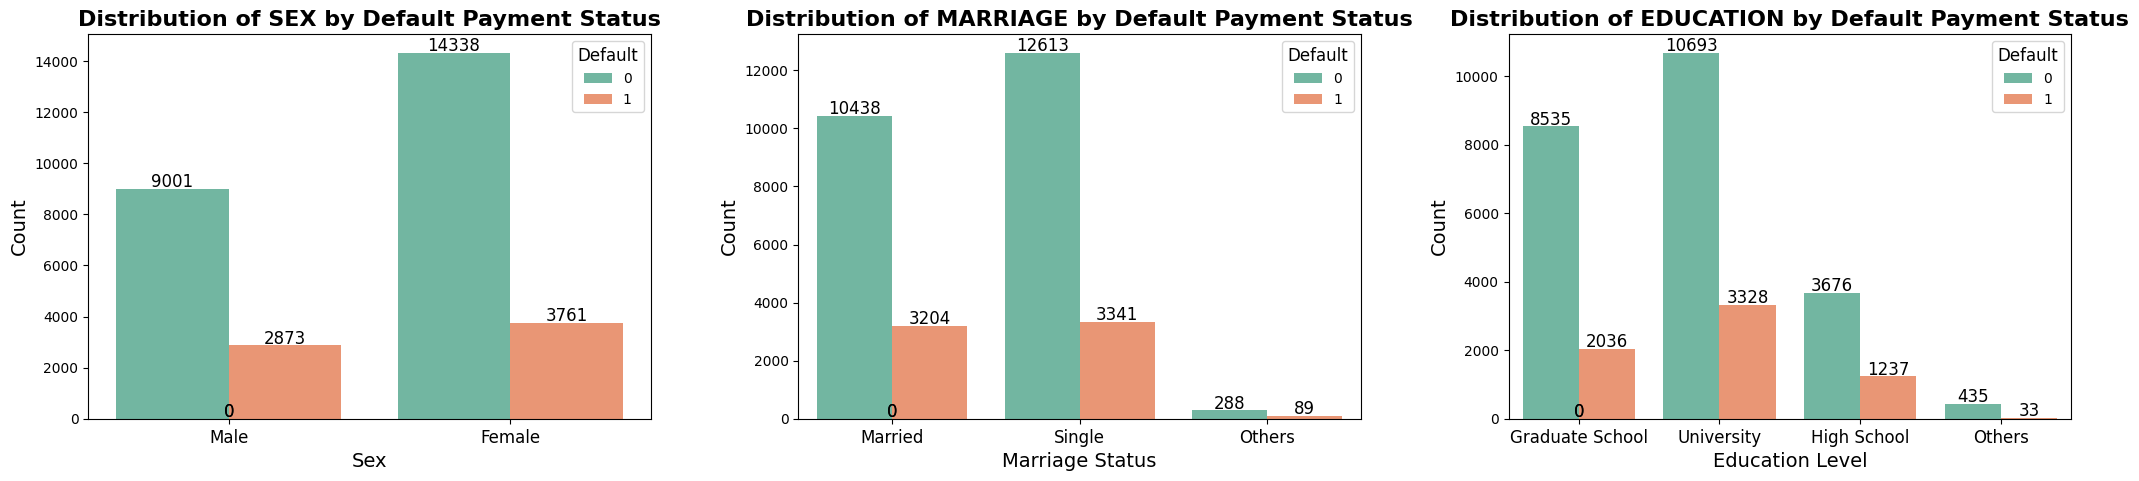

In [22]:
sns.set_palette('muted')
fig, axes = plt.subplots(1, 3, figsize=(22, 6))
sns.countplot(data=df_clean, x='SEX', hue='default_payment_next_month', ax=axes[0], palette='Set2')
axes[0].set_title('Distribution of SEX by Default Payment Status', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Sex', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].set_xticklabels(['Male', 'Female'], fontsize=12)
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
axes[0].legend(title='Default', title_fontsize=12, loc='upper right')

sns.countplot(data=df_clean, x='MARRIAGE', hue='default_payment_next_month', ax=axes[1], palette='Set2')
axes[1].set_title('Distribution of MARRIAGE by Default Payment Status', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Marriage Status', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].set_xticklabels(['Married', 'Single', 'Others'], fontsize=12)
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
axes[1].legend(title='Default', title_fontsize=12, loc='upper right')

sns.countplot(data=df_clean, x='EDUCATION', hue='default_payment_next_month', ax=axes[2], palette='Set2')
axes[2].set_title('Distribution of EDUCATION by Default Payment Status', fontsize=16, fontweight='bold')
axes[2].set_xlabel('Education Level', fontsize=14)
axes[2].set_ylabel('Count', fontsize=14)
axes[2].set_xticklabels(['Graduate School', 'University', 'High School', 'Others'], fontsize=12)
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
axes[2].legend(title='Default', title_fontsize=12, loc='upper right')

plt.tight_layout(pad=5.0)
plt.show()

_observations:_

* The default rate is similar between genders

* Default rates are relatively consistent across marriage status

*  Default rates decrease with higher education:
   - Graduate school: ~19.3%
   - University: ~23.7%
   - High school: ~25.2%
   - Others: ~7.1% (notably lower, but small sample size)

Overall, education level appears to have the most noticeable relationship with default rates, while gender and marriage status show relatively consistent default rates across categories.

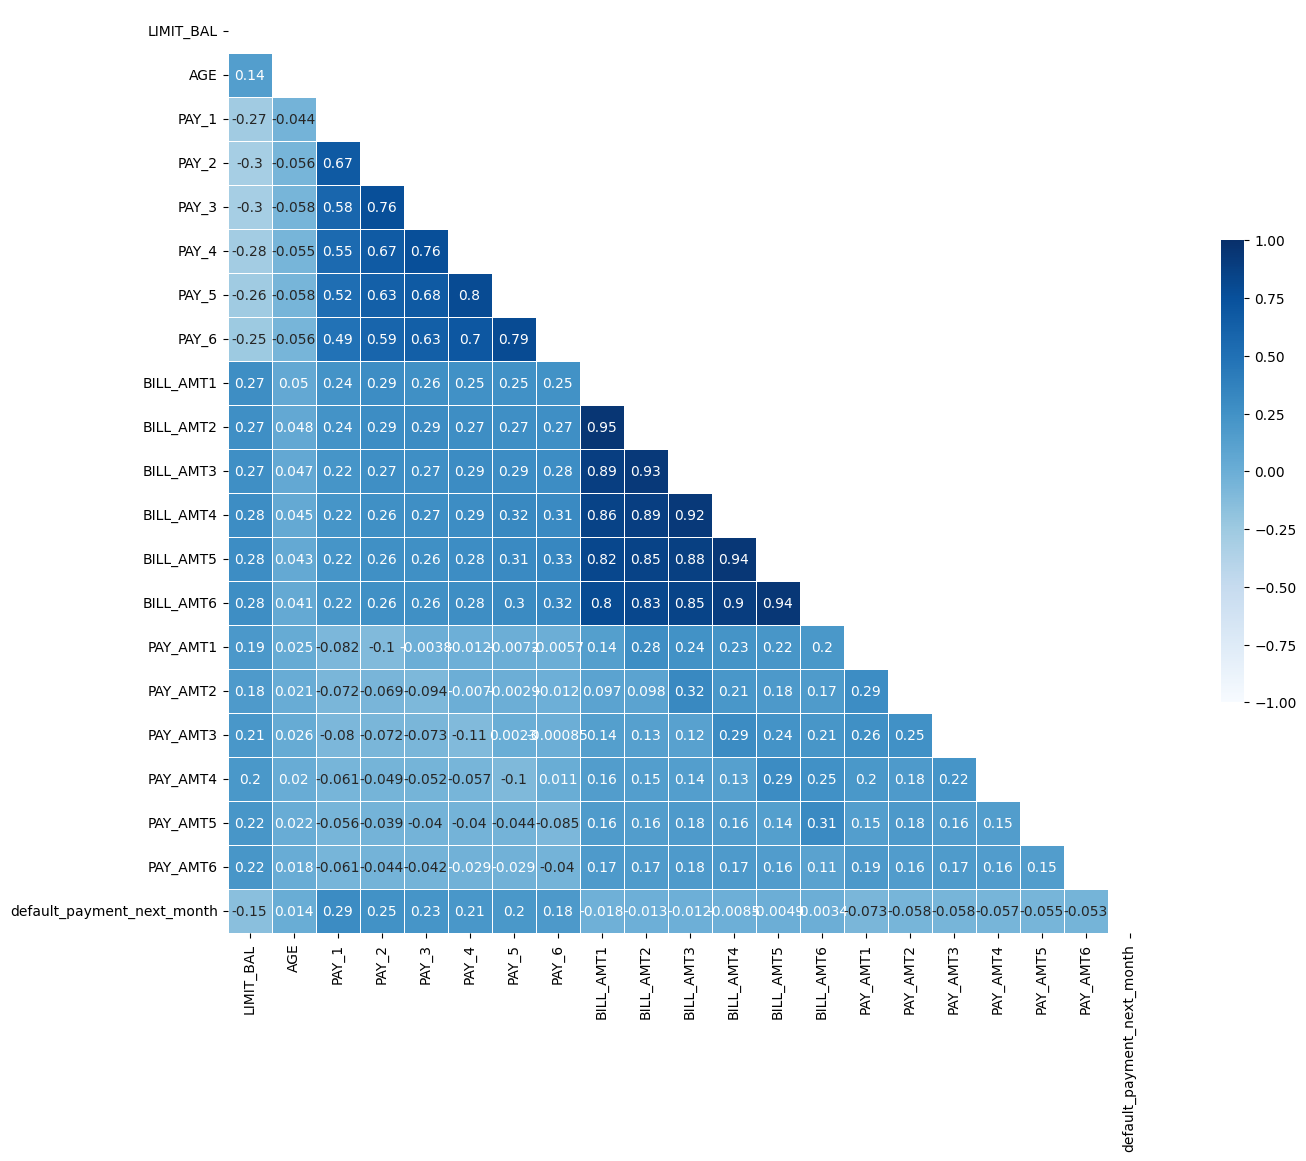

In [23]:
corr = df_clean.drop(['SEX', 'EDUCATION', 'MARRIAGE'], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18,12))
ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cmap='Blues', cbar_kws={'shrink': .5}, annot=True, annot_kws={'size': 10})
cbar = ax.collections[0].colorbar
plt.show()

_observations:_

* There is high correlation `BILL_AMTn` , may indicate redundancy of information

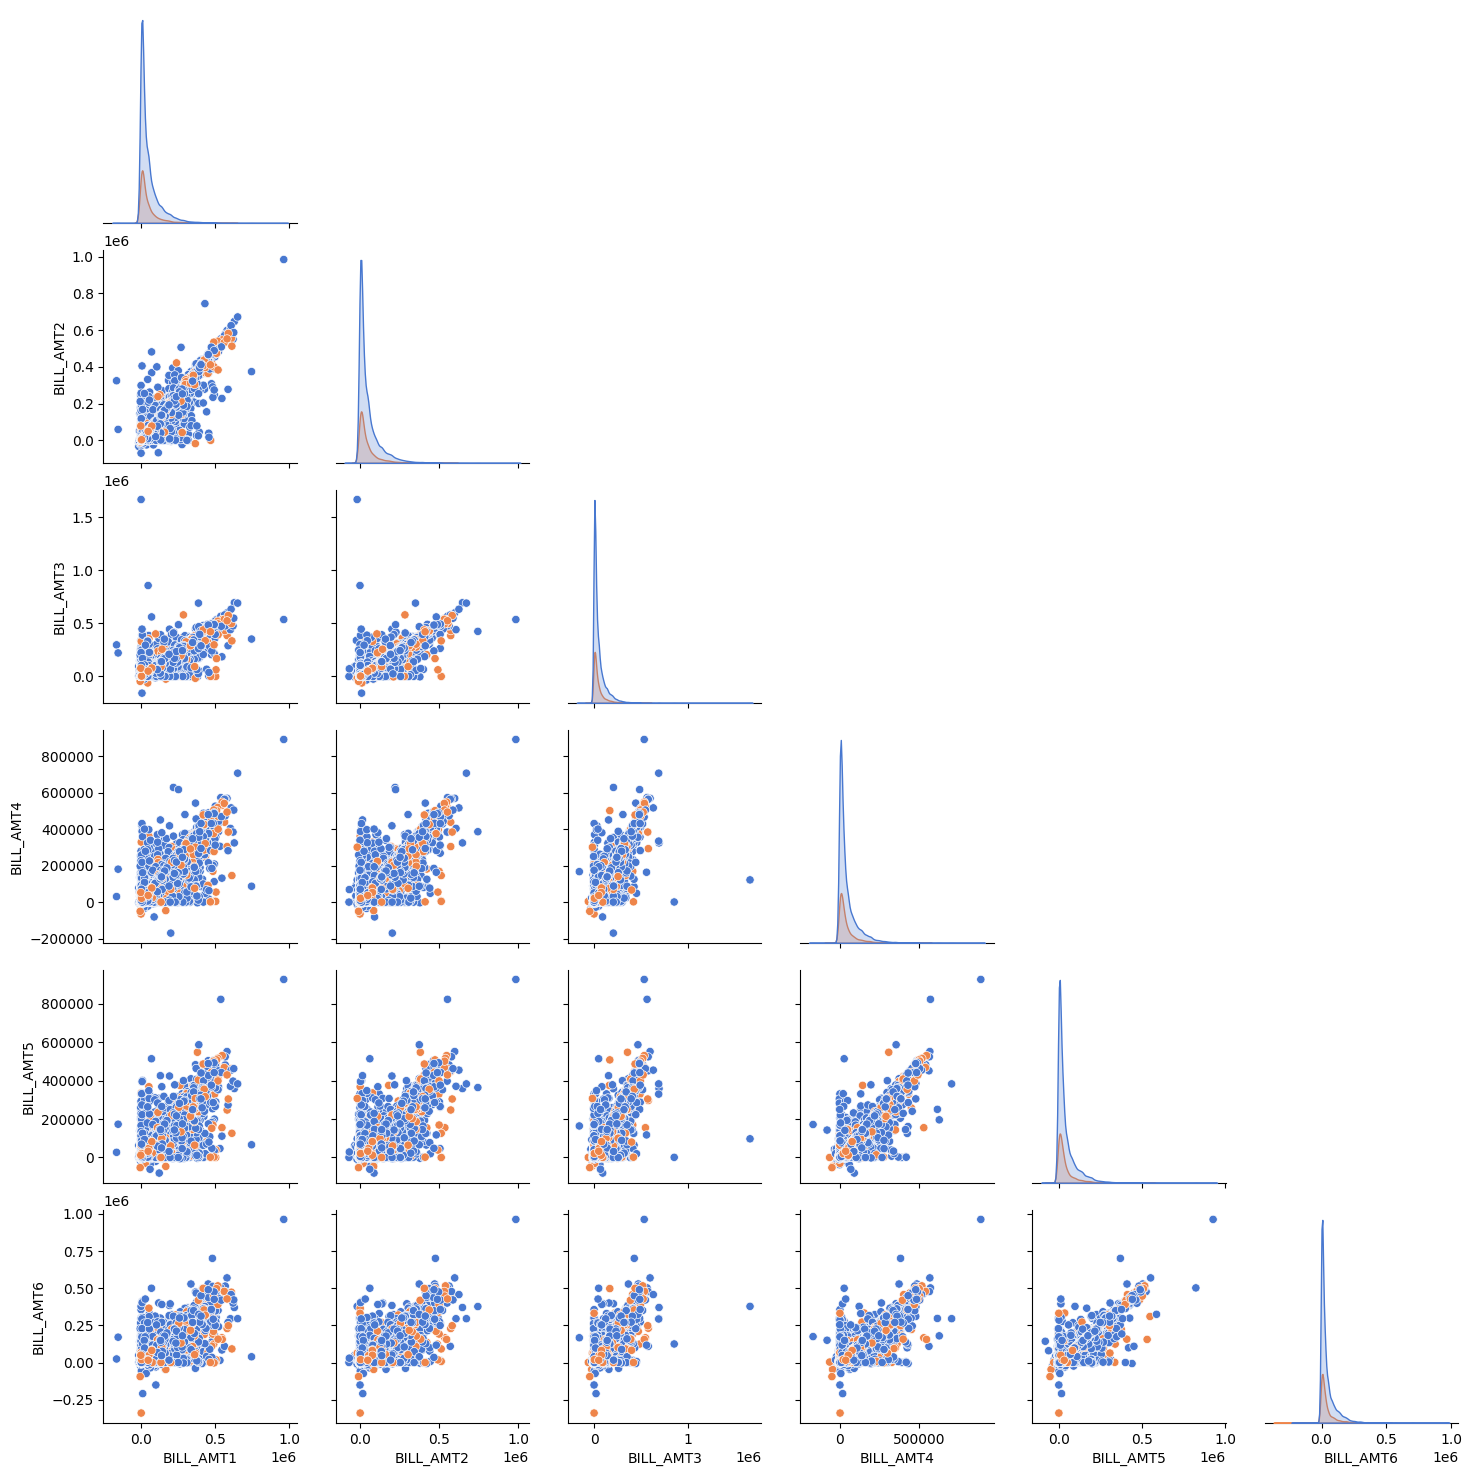

In [24]:
pair_plot = sns.pairplot(df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','default_payment_next_month']], hue='default_payment_next_month', diag_kind='kde', corner=True)
pair_plot._legend.remove()
plt.show()

_observations:_

* `BILL_AMTn` has different information , may be they are encoded

### Model Building

#### one hot encoding

In [25]:
df_clean['GRAD_SCHOOL'] = (df_clean['EDUCATION'] == 1).astype('int')
df_clean['UNIVERSITY'] = (df_clean['EDUCATION'] == 2).astype('int')
df_clean['HIGH_SCHOOL'] = (df_clean['EDUCATION'] == 3).astype('int')
df_clean['Education_OTHERS'] = (df_clean['EDUCATION'] ==4).astype('int')
df_clean.drop('EDUCATION', axis=1, inplace=True)

df_clean['MALE'] = (df_clean['SEX'] == 1).astype('int')
df_clean['FEMALE'] = (df_clean['SEX'] == 2).astype('int')
df_clean.drop('SEX', axis=1, inplace=True)

df_clean['MARRIED'] = (df_clean['MARRIAGE'] == 1).astype('int')
df_clean['SINGLE'] = (df_clean['MARRIAGE'] == 2).astype('int')
df_clean['OTHER'] = (df_clean['MARRIAGE'] == 3).astype('int')
df_clean.drop('MARRIAGE', axis=1, inplace=True)



In [26]:
df_clean.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,default_payment_next_month,GRAD_SCHOOL,UNIVERSITY,HIGH_SCHOOL,Education_OTHERS,MALE,FEMALE,MARRIED,SINGLE,OTHER
0,20000,24,3,3,-1,-1,-1,-1,3913,3102,...,1,0,1,0,0,0,1,1,0,0
1,120000,26,-1,3,1,1,1,3,2682,1725,...,1,0,1,0,0,0,1,0,1,0
2,90000,34,1,1,1,1,1,1,29239,14027,...,0,0,1,0,0,0,1,0,1,0
3,50000,37,1,1,1,1,1,1,46990,48233,...,0,0,1,0,0,0,1,1,0,0
4,50000,57,-1,1,-1,1,1,1,8617,5670,...,0,0,1,0,0,1,0,1,0,0


#### Splitting the data

In [27]:
x=df_clean.drop('default_payment_next_month', axis=1)
y=df_clean['default_payment_next_month']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y)


#### SMOTE

In [29]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Before SMOTE:")
print(f"Training data shape: {X_train.shape}")
print(f"Training target distribution: \n{y_train.value_counts()}")
print("\nAfter SMOTE:")
print(f"Training data shape: {X_train_smote.shape}")
print(f"Training target distribution: \n{y_train_smote.value_counts()}")

Before SMOTE:
Training data shape: (20981, 29)
Training target distribution: 
default_payment_next_month
0    16337
1     4644
Name: count, dtype: int64

After SMOTE:
Training data shape: (32674, 29)
Training target distribution: 
default_payment_next_month
0    16337
1    16337
Name: count, dtype: int64


#### standardizing the continuous variables

In [30]:
scaler = StandardScaler()
X_train_std = X_train_smote.copy()
X_test_std = X_test.copy()
X_train_std['LIMIT_BAL'] = scaler.fit_transform(X_train_smote['LIMIT_BAL'].values.reshape(-1, 1))
X_test_std['LIMIT_BAL'] = scaler.transform(X_test['LIMIT_BAL'].values.reshape(-1, 1))

X_train_std['AGE'] = scaler.fit_transform(X_train_smote['AGE'].values.reshape(-1, 1))
X_test_std['AGE'] = scaler.transform(X_test['AGE'].values.reshape(-1, 1))

for i in range(1, 7):
    X_train_std['PAY_' + str(i)] = scaler.fit_transform(X_train_smote['PAY_' + str(i)].values.reshape(-1, 1))
    X_test_std['PAY_' + str(i)] = scaler.transform(X_test['PAY_' + str(i)].values.reshape(-1, 1))

    X_train_std['BILL_AMT' + str(i)] = scaler.fit_transform(X_train_smote['BILL_AMT' + str(i)].values.reshape(-1, 1))
    X_test_std['BILL_AMT' + str(i)] = scaler.transform(X_test['BILL_AMT' + str(i)].values.reshape(-1, 1))

    X_train_std['PAY_AMT' + str(i)] = scaler.fit_transform(X_train_smote['PAY_AMT' + str(i)].values.reshape(-1, 1))
    X_test_std['PAY_AMT' + str(i)] = scaler.transform(X_test['PAY_AMT' + str(i)].values.reshape(-1, 1))


#### Dimensionality Reduction

In [31]:
pc = len(X_train_std.columns.values)
pca = PCA(n_components=pc)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

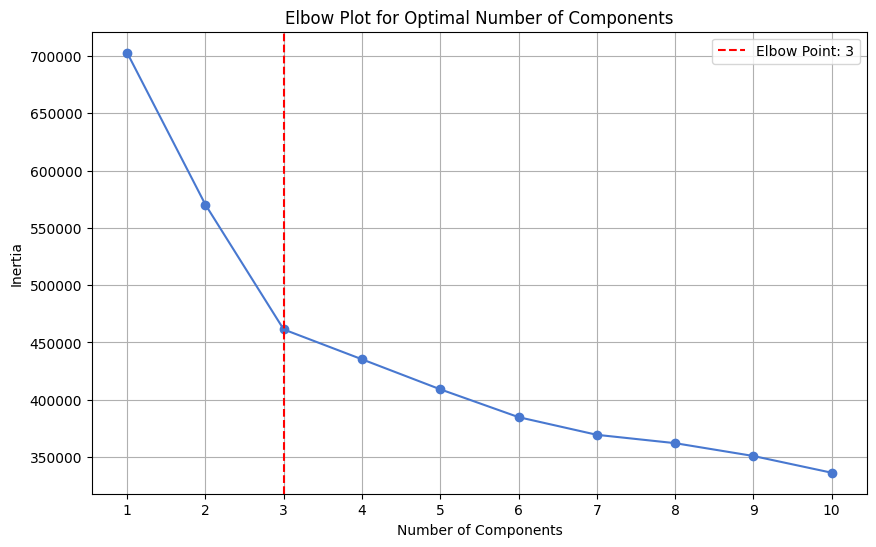

In [32]:
cluster_range = range(1, 11)
inertia = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_std)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Plot for Optimal Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
kneedle = KneeLocator(cluster_range, inertia, curve='convex', direction='decreasing')
elbow_point = kneedle.elbow
plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Elbow Point: {elbow_point}')
plt.legend()
plt.show()

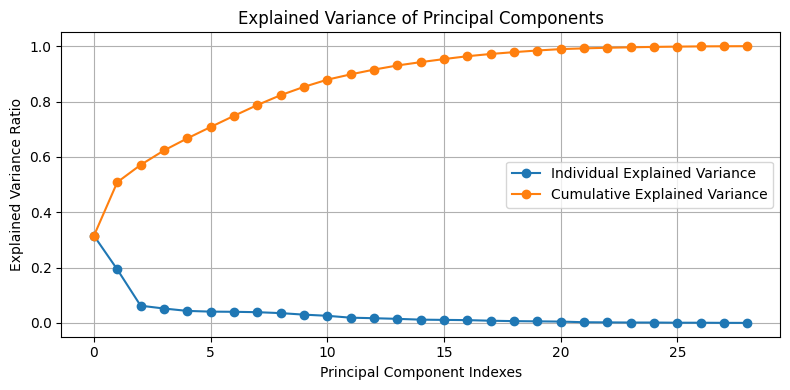

In [33]:
sns.reset_orig()
sns.set_color_codes('pastel')
plt.figure(figsize=(8, 4))
plt.grid()
plt.title('Explained Variance of Principal Components')
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.legend(["Individual Explained Variance", "Cumulative Explained Variance"])
plt.xlabel('Principal Component Indexes')
plt.ylabel('Explained Variance Ratio')
plt.tight_layout()
plt.show()

In [34]:
X_train_pca_full = pca.fit_transform(X_train_std)
X_train_pca = X_train_pca_full[:, 3:]

X_test_pca_full = pca.fit_transform(X_test_std)
X_test_pca = X_test_pca_full[:, 3:]

#### Model with out pca

In [35]:
model_knn = KNeighborsClassifier(n_neighbors=5,algorithm='kd_tree')
model_svm = LinearSVC(random_state=42)
model_dt = DecisionTreeClassifier(max_depth=10, random_state=42)
model_rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
model_nb = GaussianNB()
model_GB = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)

In [36]:
model_knn.fit(X_train_std, y_train_smote)
model_svm.fit(X_train_std, y_train_smote)
model_dt.fit(X_train_std, y_train_smote)
model_rf.fit(X_train_std, y_train_smote)
model_nb.fit(X_train_std, y_train_smote)
model_GB.fit(X_train_std, y_train_smote)

GradientBoostingClassifier(n_estimators=50, random_state=42)

In [37]:
y_pred_knn = model_knn.predict(X_test_std)
y_pred_svm = model_svm.predict(X_test_std)
y_pred_dt = model_dt.predict(X_test_std)
y_pred_rf = model_rf.predict(X_test_std)
y_pred_nb = model_nb.predict(X_test_std)
y_pred_GB = model_GB.predict(X_test_std)

In [38]:
y_probs_knn = model_knn.predict_proba(X_test_std)[:,1]
y_probs_svm = model_svm.decision_function(X_test_std)
y_probs_dt = model_dt.predict_proba(X_test_std)[:,1]
y_probs_rf = model_rf.predict_proba(X_test_std)[:,1]
y_probs_nb = model_nb.predict_proba(X_test_std)[:,1]
y_probs_GB = model_GB.predict_proba(X_test_std)[:,1]


#### Model with pca

In [39]:
model_knn.fit(X_train_pca, y_train_smote)
model_svm.fit(X_train_pca, y_train_smote)
model_dt.fit(X_train_pca, y_train_smote)
model_rf.fit(X_train_pca, y_train_smote)
model_nb.fit(X_train_pca, y_train_smote)
model_GB.fit(X_train_pca, y_train_smote)

GradientBoostingClassifier(n_estimators=50, random_state=42)

In [40]:
y_pred_knn_pca = model_knn.predict(X_test_pca)
y_pred_svm_pca = model_svm.predict(X_test_pca)
y_pred_dt_pca = model_dt.predict(X_test_pca)
y_pred_rf_pca = model_rf.predict(X_test_pca)
y_pred_nb_pca= model_nb.predict(X_test_pca)
y_pred_GB_pca= model_GB.predict(X_test_pca)

In [41]:
y_probs_knn_pca = model_knn.predict_proba(X_test_pca)[:,1]
y_probs_svm_pca = model_svm.decision_function(X_test_pca)
y_probs_dt_pca = model_dt.predict_proba(X_test_pca)[:,1]
y_probs_rf_pca = model_rf.predict_proba(X_test_pca)[:,1]
y_probs_nb_pca = model_nb.predict_proba(X_test_pca)[:,1]
y_probs_GB_pca = model_GB.predict_proba(X_test_pca)[:,1]

#### confusion matrix

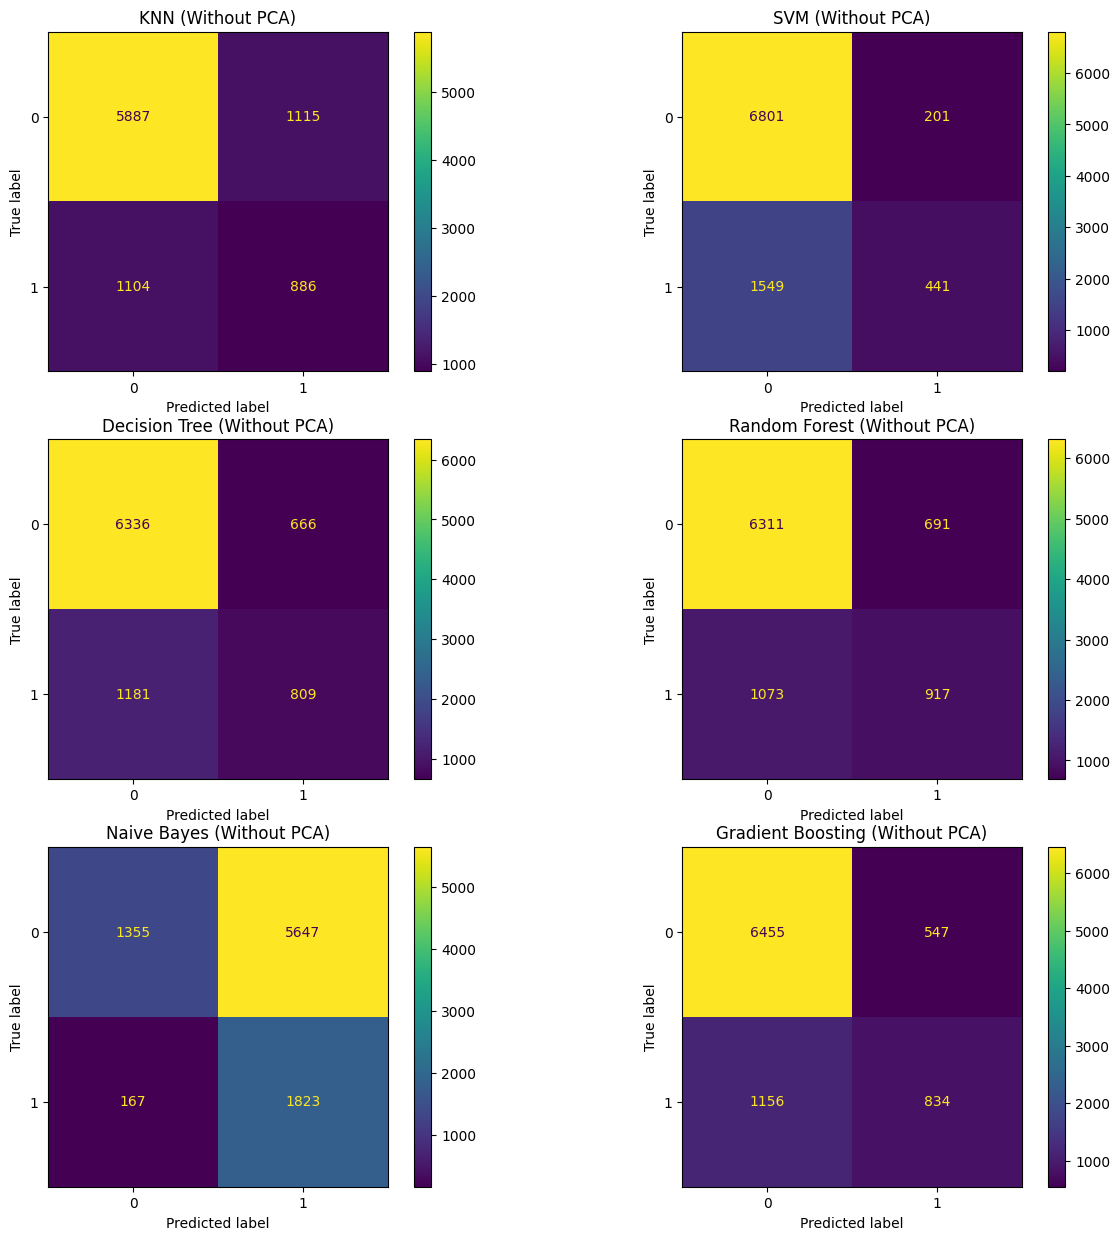

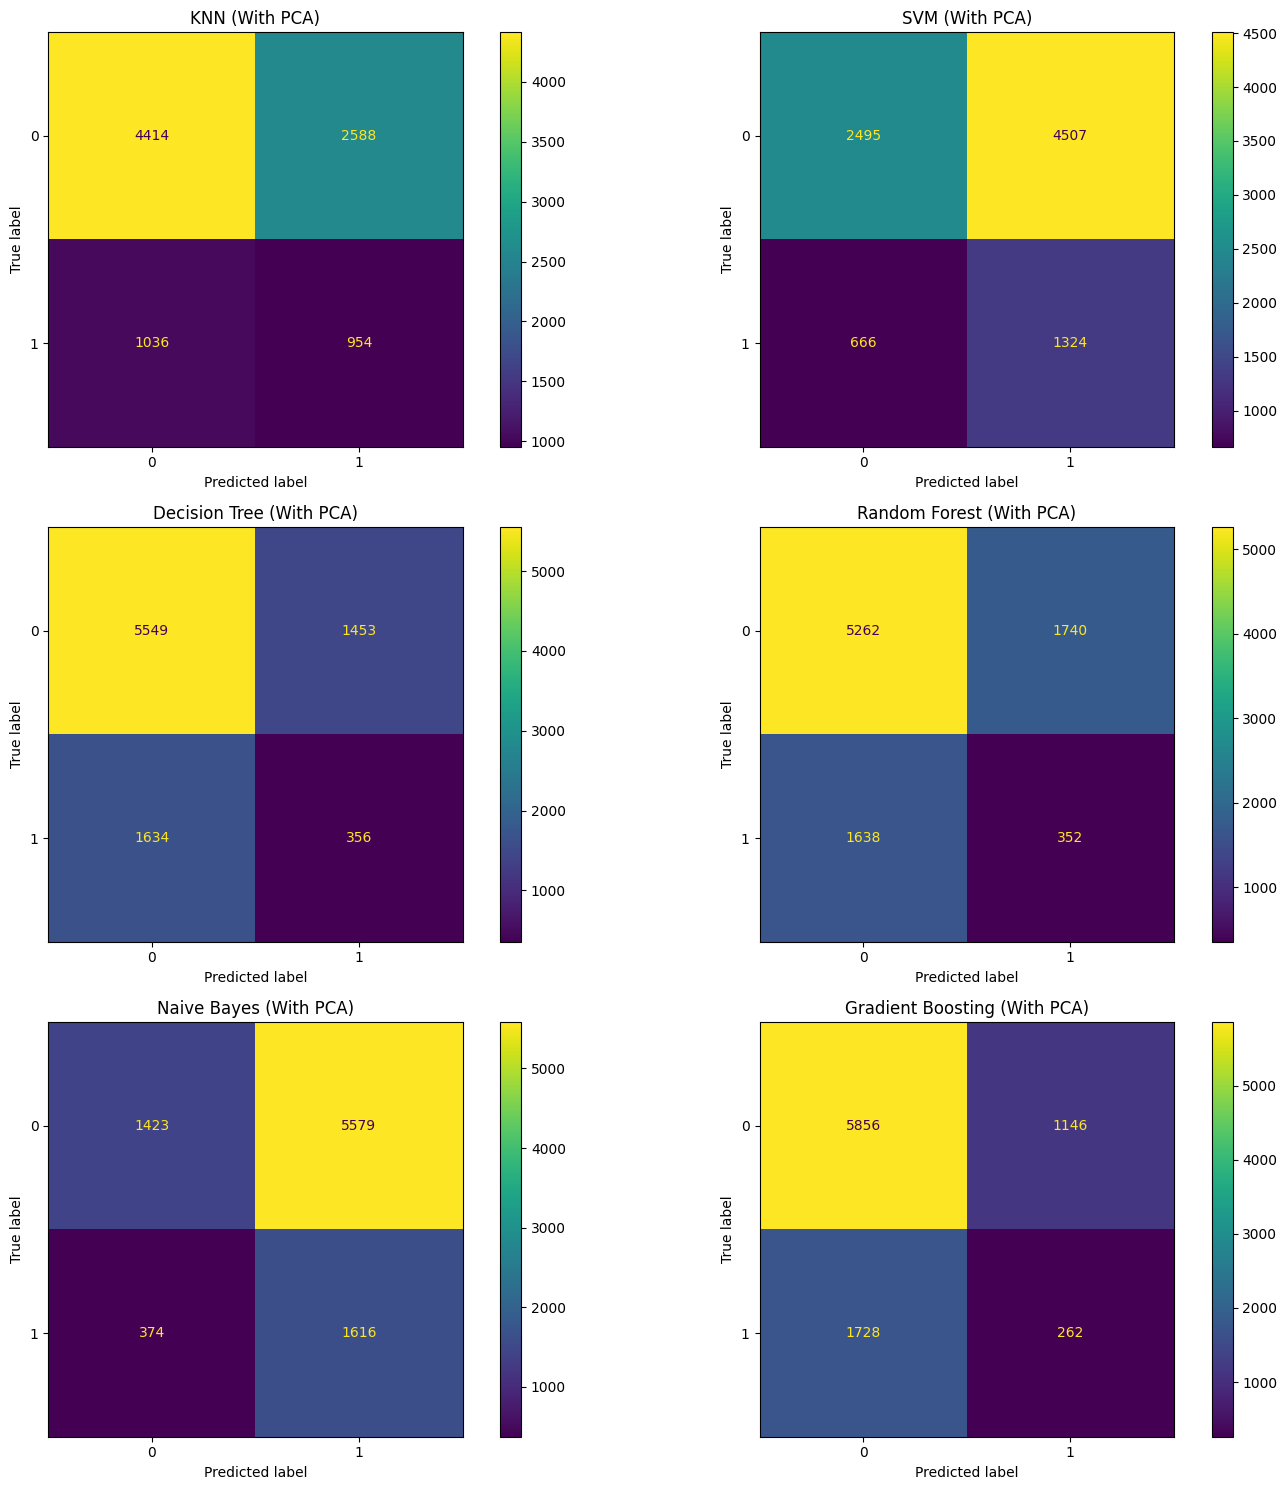

In [42]:
models = {
    "KNN": (model_knn, y_pred_knn),
    "SVM": (model_svm, y_pred_svm),
    "Decision Tree": (model_dt, y_pred_dt),
    "Random Forest": (model_rf, y_pred_rf),
    "Naive Bayes": (model_nb, y_pred_nb),
    "Gradient Boosting": (model_GB, y_pred_GB),
}

models_pca = {
    "KNN": (model_knn, y_pred_knn_pca),
    "SVM": (model_svm, y_pred_svm_pca),
    "Decision Tree": (model_dt, y_pred_dt_pca),
    "Random Forest": (model_rf, y_pred_rf_pca),
    "Naive Bayes": (model_nb, y_pred_nb_pca),
    "Gradient Boosting": (model_GB, y_pred_GB_pca),
}
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
for ax, (model_name, (model, y_pred)) in zip(axes.flatten(), models.items()):
    cm = confusion_matrix(y_test, y_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax, values_format='d')
    ax.title.set_text(f"{model_name} (Without PCA)")

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
for ax, (model_name, (model, y_pred)) in zip(axes.flatten(), models_pca.items()):
    cm = confusion_matrix(y_test, y_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax, values_format='d')
    ax.title.set_text(f"{model_name} (With PCA)")

plt.tight_layout()
plt.show()

#### classification report

In [43]:
reports = {
    "KNN": classification_report(y_test, y_pred_knn, output_dict=True),
    "SVM": classification_report(y_test, y_pred_svm, output_dict=True),
    "Decision Tree": classification_report(y_test, y_pred_dt, output_dict=True),
    "Random Forest": classification_report(y_test, y_pred_rf, output_dict=True),
    "Naive Bayes": classification_report(y_test, y_pred_nb, output_dict=True),
    "Gradient Boosting": classification_report(y_test, y_pred_GB, output_dict=True),
}
report_df = pd.DataFrame({
    model: {
        "Precision": reports[model]["weighted avg"]["precision"],
        "Recall": reports[model]["weighted avg"]["recall"],
        "F1-Score": reports[model]["weighted avg"]["f1-score"],
        "Accuracy": reports[model]["accuracy"]
    }
    for model in reports
}).T
report_df
reports_pca = {
    "KNN": classification_report(y_test, y_pred_knn_pca, output_dict=True),
    "SVM": classification_report(y_test, y_pred_svm_pca, output_dict=True),
    "Decision Tree": classification_report(y_test, y_pred_dt_pca, output_dict=True),
    "Random Forest": classification_report(y_test, y_pred_rf_pca, output_dict=True),
    "Naive Bayes": classification_report(y_test, y_pred_nb_pca, output_dict=True),
    "Gradient Boosting": classification_report(y_test, y_pred_GB_pca, output_dict=True),
}

report_df_pca = pd.DataFrame({
    model: {
        "Precision": reports_pca[model]["weighted avg"]["precision"],
        "Recall": reports_pca[model]["weighted avg"]["recall"],
        "F1-Score": reports_pca[model]["weighted avg"]["f1-score"],
        "Accuracy": reports_pca[model]["accuracy"]
    }
    for model in reports_pca
}).T
report_comparison = pd.concat([report_df, report_df_pca], axis=1, keys=['Without PCA', 'With PCA'])
report_comparison

Without PCA                                With PCA  \
                    Precision    Recall  F1-Score  Accuracy Precision   
KNN                  0.753714  0.753225  0.753468  0.753225  0.690276   
SVM                  0.786258  0.805383  0.764089  0.805383  0.664878   
Decision Tree        0.777733  0.794595  0.782974  0.794595  0.645106   
Random Forest        0.791743  0.803826  0.796016  0.803826  0.631075   
Naive Bayes          0.747260  0.353425  0.332861  0.353425  0.666333   
Gradient Boosting    0.794070  0.810609  0.797448  0.810609  0.642449   

                                                 
                     Recall  F1-Score  Accuracy  
KNN                0.596975  0.628393  0.596975  
SVM                0.424711  0.457265  0.424711  
Decision Tree      0.656695  0.650707  0.656695  
Random Forest      0.624333  0.627648  0.624333  
Naive Bayes        0.337967  0.329738  0.337967  
Gradient Boosting  0.680383  0.659388  0.680383

In [44]:


bump_data = report_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
bump_data.rename(columns={'index': 'Model'}, inplace=True)
fig = px.line(bump_data, x='Metric', y='Score', color='Model', markers=True, line_shape='linear')
fig.update_layout(title='Classification Report Metrics for Each Model', xaxis_title='Metric', yaxis_title='Score')
bump_data_pca = report_df_pca.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
bump_data_pca.rename(columns={'index': 'Model'}, inplace=True)
fig_pca = px.line(bump_data_pca, x='Metric', y='Score', color='Model', markers=True, line_shape='linear')
fig_pca.update_layout(title='Classification Report Metrics for Each Model (With PCA)', xaxis_title='Metric', yaxis_title='Score')


fig_combined = make_subplots(rows=1, cols=2, subplot_titles=('Without PCA', 'With PCA'))

for trace in fig.data:
    fig_combined.add_trace(trace, row=1, col=1)

for trace in fig_pca.data:
    fig_combined.add_trace(trace, row=1, col=2)

fig_combined.update_layout(title_text='Classification Report Metrics for Each Model', showlegend=False)
fig_combined.show()

#### auc

In [45]:
auc_knn = roc_auc_score(y_test, y_probs_knn)
auc_svm = roc_auc_score(y_test, y_probs_svm)
auc_dt = roc_auc_score(y_test, y_probs_dt)
auc_rf = roc_auc_score(y_test, y_probs_rf)
auc_nb = roc_auc_score(y_test, y_probs_nb)
auc_gb = roc_auc_score(y_test, y_probs_GB)
auc_scores = {
    "Model": ["KNN", "SVM", "Decision Tree", "Random Forest", "Naive Bayes", "Gradient Boosting"],
    "AUC Score": [auc_knn, auc_svm, auc_dt, auc_rf, auc_nb, auc_gb]
}
auc_df = pd.DataFrame(auc_scores)

auc_knn_pca = roc_auc_score(y_test, y_probs_knn_pca)
auc_svm_pca = roc_auc_score(y_test, y_probs_svm_pca)
auc_dt_pca = roc_auc_score(y_test, y_probs_dt_pca)
auc_rf_pca = roc_auc_score(y_test, y_probs_rf_pca)
auc_nb_pca = roc_auc_score(y_test, y_probs_nb_pca)
auc_gb_pca = roc_auc_score(y_test, y_probs_GB_pca)

auc_scores_pca = {
    "Model": ["KNN (PCA)", "SVM (PCA)", "Decision Tree (PCA)", "Random Forest (PCA)", "Naive Bayes (PCA)", "Gradient Boosting (PCA)"],
    "AUC Score": [auc_knn_pca, auc_svm_pca, auc_dt_pca, auc_rf_pca, auc_nb_pca, auc_gb_pca]
}

auc_df_pca = pd.DataFrame(auc_scores_pca)
auc_comparison = pd.concat([auc_df, auc_df_pca], axis=1)
auc_comparison

,Model,AUC Score,Model,AUC Score
0,KNN,0.694691,KNN (PCA),0.562824
1,SVM,0.711455,SVM (PCA),0.516038
2,Decision Tree,0.718705,Decision Tree (PCA),0.477902
3,Random Forest,0.770312,Random Forest (PCA),0.501483
4,Naive Bayes,0.692166,Naive Bayes (PCA),0.480204
5,Gradient Boosting,0.766307,Gradient Boosting (PCA),0.519434


#### roc curve

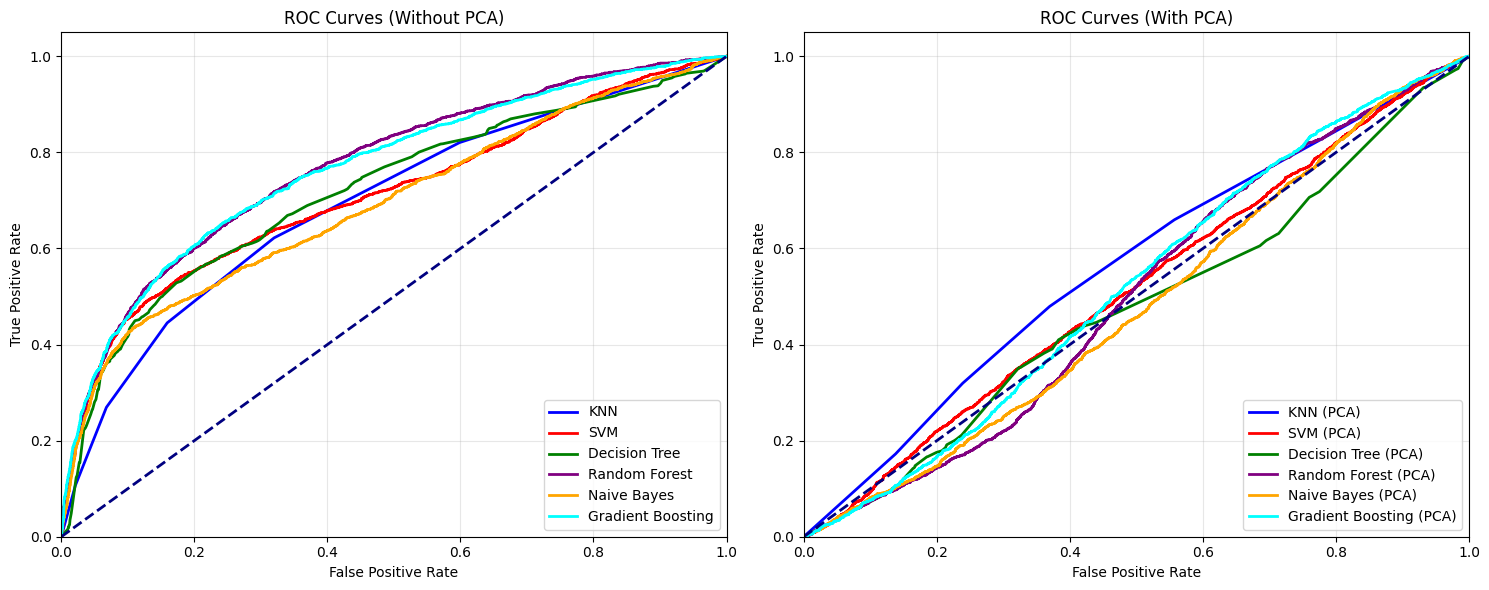

In [46]:
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_probs_svm)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_probs_nb)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_probs_GB)

fpr_knn_pca, tpr_knn_pca, _ = roc_curve(y_test, y_probs_knn_pca)
fpr_svm_pca, tpr_svm_pca, _ = roc_curve(y_test, y_probs_svm_pca)
fpr_dt_pca, tpr_dt_pca, _ = roc_curve(y_test, y_probs_dt_pca)
fpr_rf_pca, tpr_rf_pca, _ = roc_curve(y_test, y_probs_rf_pca)
fpr_nb_pca, tpr_nb_pca, _ = roc_curve(y_test, y_probs_nb_pca)
fpr_gb_pca, tpr_gb_pca, _ = roc_curve(y_test, y_probs_GB_pca)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN')
axes[0].plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM')
axes[0].plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree')
axes[0].plot(fpr_rf, tpr_rf, color='purple', lw=2, label='Random Forest')
axes[0].plot(fpr_nb, tpr_nb, color='orange', lw=2, label='Naive Bayes')
axes[0].plot(fpr_gb, tpr_gb, color='cyan', lw=2, label='Gradient Boosting')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curves (Without PCA)')
axes[0].legend(loc="lower right")
axes[0].grid(True, alpha=0.3)

axes[1].plot(fpr_knn_pca, tpr_knn_pca, color='blue', lw=2, label='KNN (PCA)')
axes[1].plot(fpr_svm_pca, tpr_svm_pca, color='red', lw=2, label='SVM (PCA)')
axes[1].plot(fpr_dt_pca, tpr_dt_pca, color='green', lw=2, label='Decision Tree (PCA)')
axes[1].plot(fpr_rf_pca, tpr_rf_pca, color='purple', lw=2, label='Random Forest (PCA)')
axes[1].plot(fpr_nb_pca, tpr_nb_pca, color='orange', lw=2, label='Naive Bayes (PCA)')
axes[1].plot(fpr_gb_pca, tpr_gb_pca, color='cyan', lw=2, label='Gradient Boosting (PCA)')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curves (With PCA)')
axes[1].legend(loc="lower right")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### callibration curve

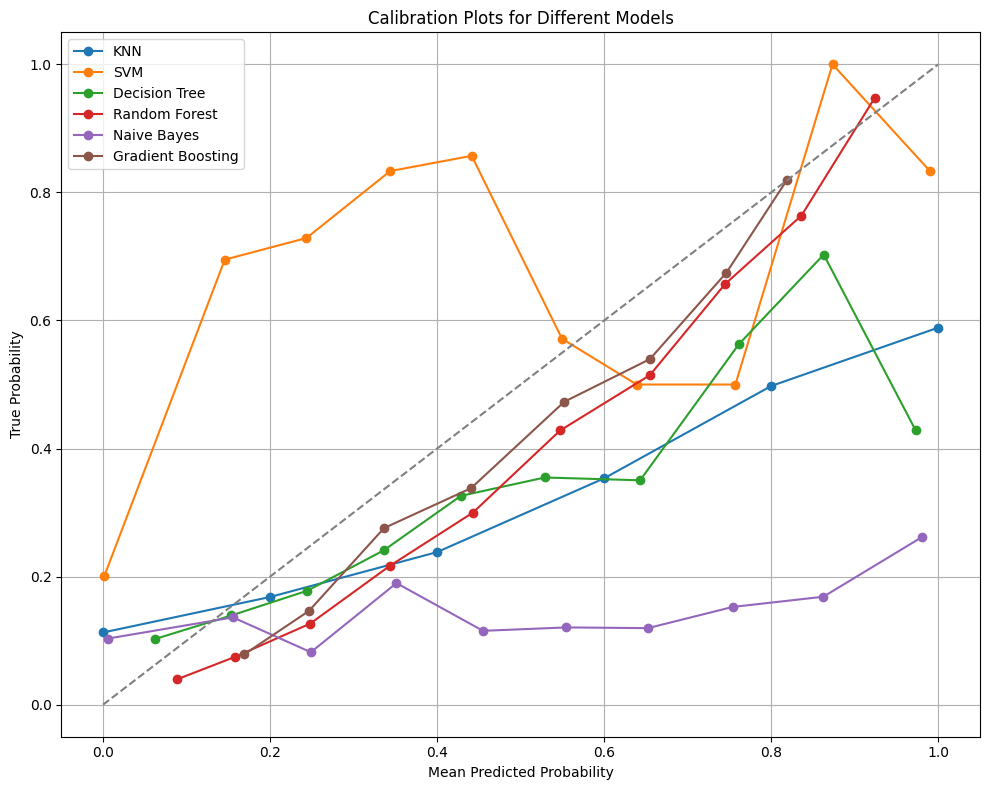

In [47]:
fig, ax = plt.subplots(figsize=(10, 8))
prob_true, prob_pred = calibration_curve(y_test, np.clip(y_probs_knn, 0, 1), n_bins=10)
ax.plot(prob_pred, prob_true, marker='o', label='KNN')
prob_true, prob_pred = calibration_curve(y_test, np.clip(y_probs_svm, 0, 1), n_bins=10)
ax.plot(prob_pred, prob_true, marker='o', label='SVM')
prob_true, prob_pred = calibration_curve(y_test, np.clip(y_probs_dt, 0, 1), n_bins=10)
ax.plot(prob_pred, prob_true, marker='o', label='Decision Tree')
prob_true, prob_pred = calibration_curve(y_test, np.clip(y_probs_rf, 0, 1), n_bins=10)
ax.plot(prob_pred, prob_true, marker='o', label='Random Forest')
prob_true, prob_pred = calibration_curve(y_test, np.clip(y_probs_nb, 0, 1), n_bins=10)
ax.plot(prob_pred, prob_true, marker='o', label='Naive Bayes')
prob_true, prob_pred = calibration_curve(y_test, np.clip(y_probs_GB, 0, 1), n_bins=10)
ax.plot(prob_pred, prob_true, marker='o', label='Gradient Boosting')
ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
ax.set_xlabel('Mean Predicted Probability')
ax.set_ylabel('True Probability')
ax.set_title('Calibration Plots for Different Models')
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

#### prediction distribution plot

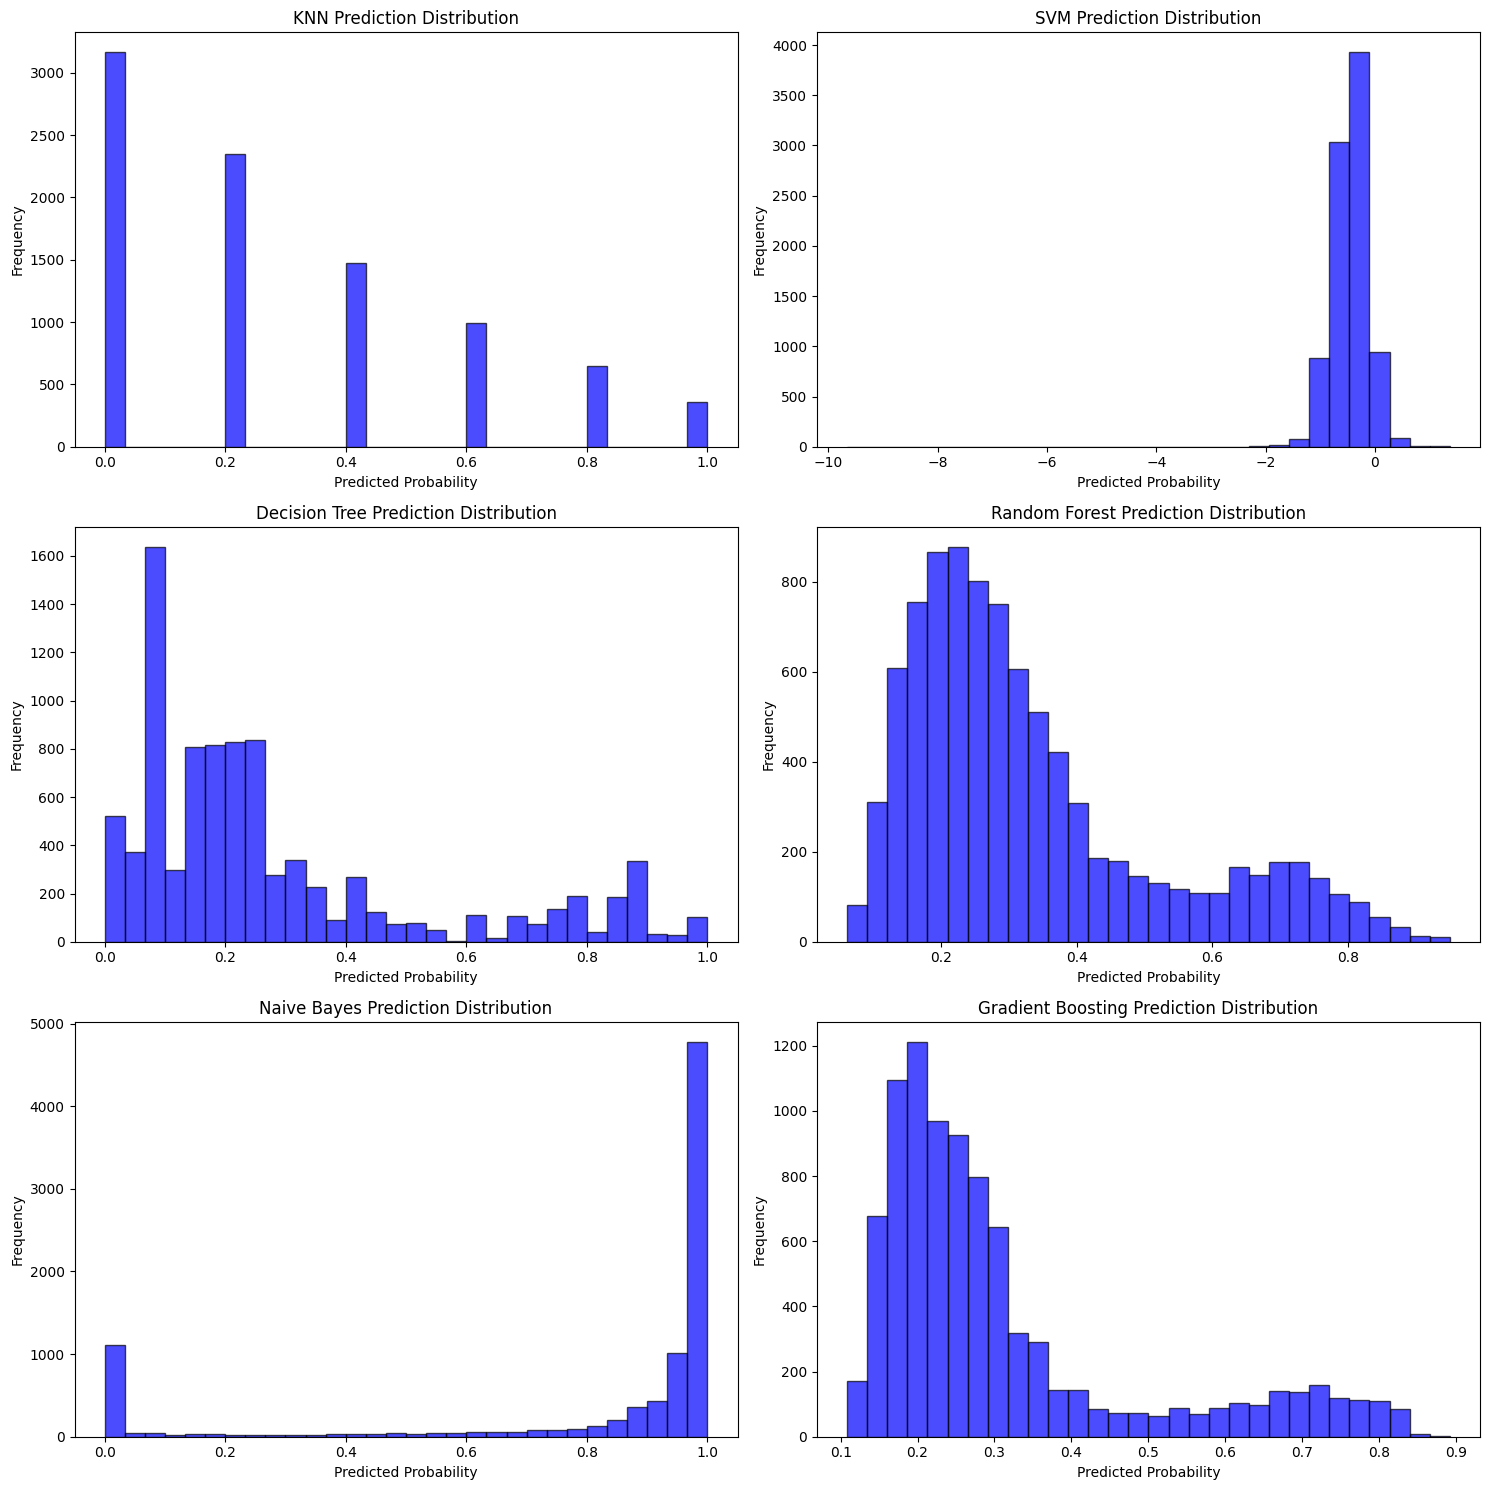

In [48]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
models_probs = {
    "KNN": y_probs_knn,
    "SVM": y_probs_svm,
    "Decision Tree": y_probs_dt,
    "Random Forest": y_probs_rf,
    "Naive Bayes": y_probs_nb,
    "Gradient Boosting": y_probs_GB
}
for ax, (model_name, y_probs) in zip(axes.flatten(), models_probs.items()):
    ax.hist(y_probs, bins=30, alpha=0.7, color='blue', edgecolor='black')
    ax.set_title(f'{model_name} Prediction Distribution')
    ax.set_xlabel('Predicted Probability')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()